In [1]:
import pandas as pd
import numpy as np
from datetime import datetime


In [14]:
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [16]:
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [17]:
(df == 'error').sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [18]:
df[df.duplicated()]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
800,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
802,SEN-1175,2025-06-25,22.21,5.42,23.4,68.4,Beans,86.5,18.3,IMG-2175
803,SEN-1735,2027-01-06,71.4,4.93,24.5,67.0,Wheat,95.5,6.2,IMG-2735
804,SEN-1242,2025-08-31,74.04,5.62,25.5,76.9,Wheat,66.9,12.9,IMG-2242
805,SEN-1764,2027-02-04,12.35,7.38,27.8,33.4,Lettuce,107.6,10.5,IMG-2764
...,...,...,...,...,...,...,...,...,...,...
908,SEN-1090,2025-04-01,18.37,7.03,21.0,47.1,Maize,94.2,8.0,IMG-2090
909,SEN-1201,2025-07-21,15.89,6.4,30.5,33.3,Tomatoes,108.3,14.5,IMG-2201
910,SEN-1309,2025-11-06,28.96,5.04,20.5,47.6,Tomatoes,81.1,12.7,IMG-2309
911,SEN-1339,2025-12-06,16.85,6.57,19.3,34.5,Beans,48.5,12.7,IMG-2339


In [29]:
df = df.replace('error', np.nan)
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [32]:
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
      df[col] = pd.to_numeric(df[col], errors='coerce')
      df.head()

In [33]:
df = df.dropna(subset=['Date', 'Crop_Type'])
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [34]:
for col in numeric_cols:
      df[col] = df[col].fillna(df[col].mean())

In [35]:
df = df.drop_duplicates()

In [36]:
df.describe()

,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,44.772689,6.246990,26.469598,60.085123,87.306161,17.401661
std,20.439044,1.021199,4.856851,17.411479,34.856077,7.149159
min,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,26.970000,5.330000,22.325000,46.100000,57.350000,11.300000
50%,45.205000,6.254078,26.600000,59.950000,85.750000,17.423778
75%,62.642500,7.080000,30.600000,75.275000,117.600000,23.700000
max,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000


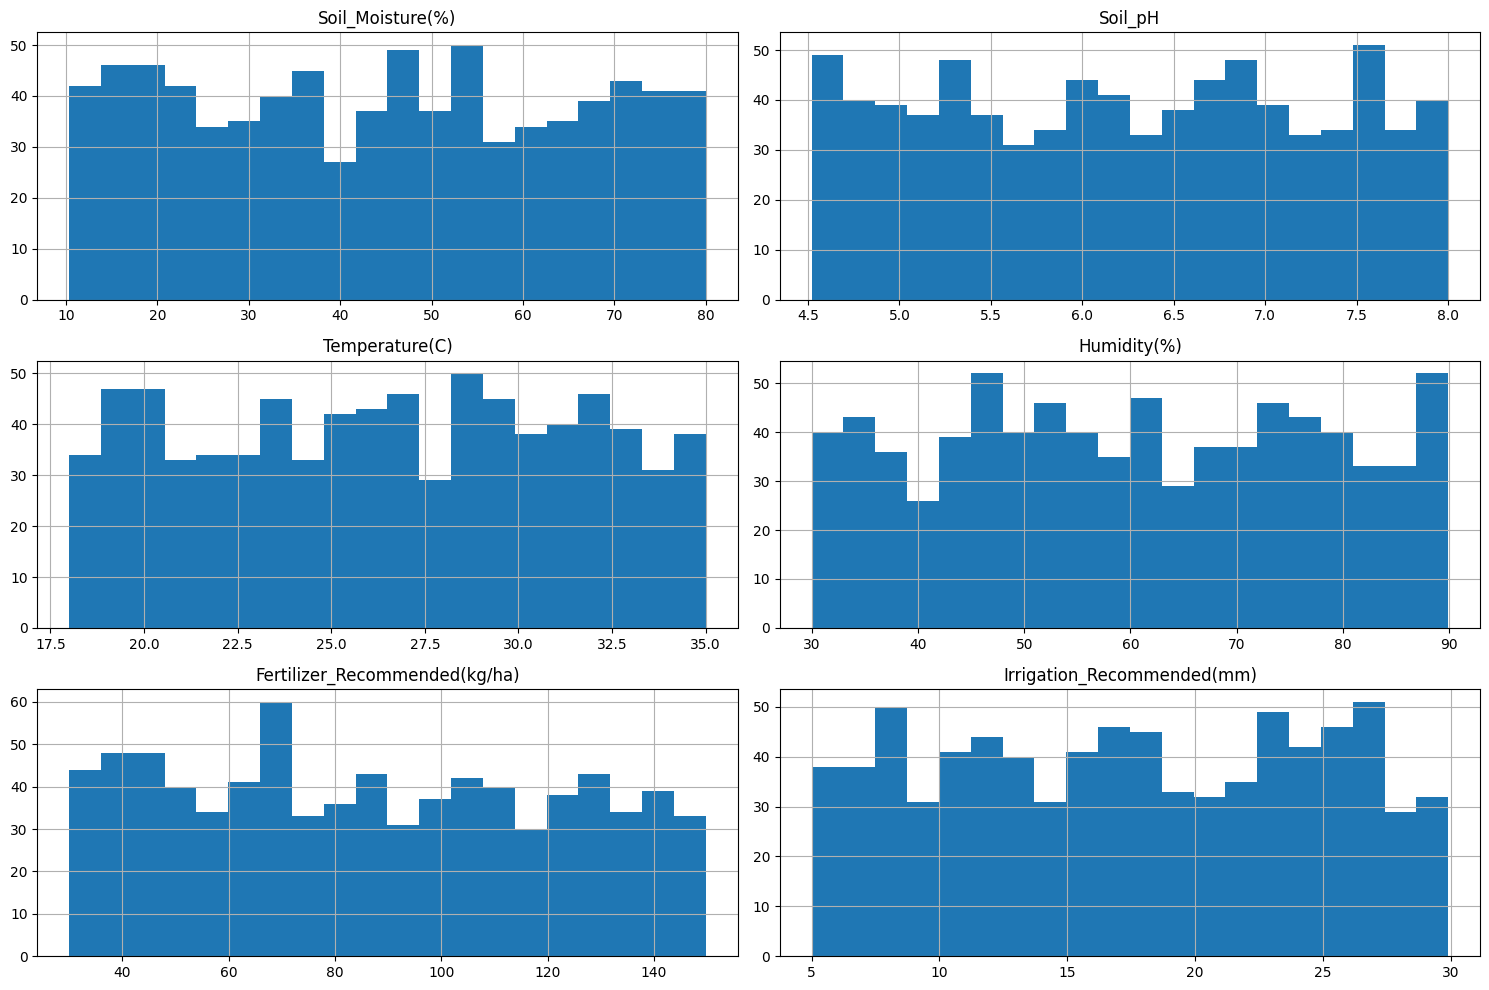

In [41]:
import matplotlib.pyplot as plt
df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

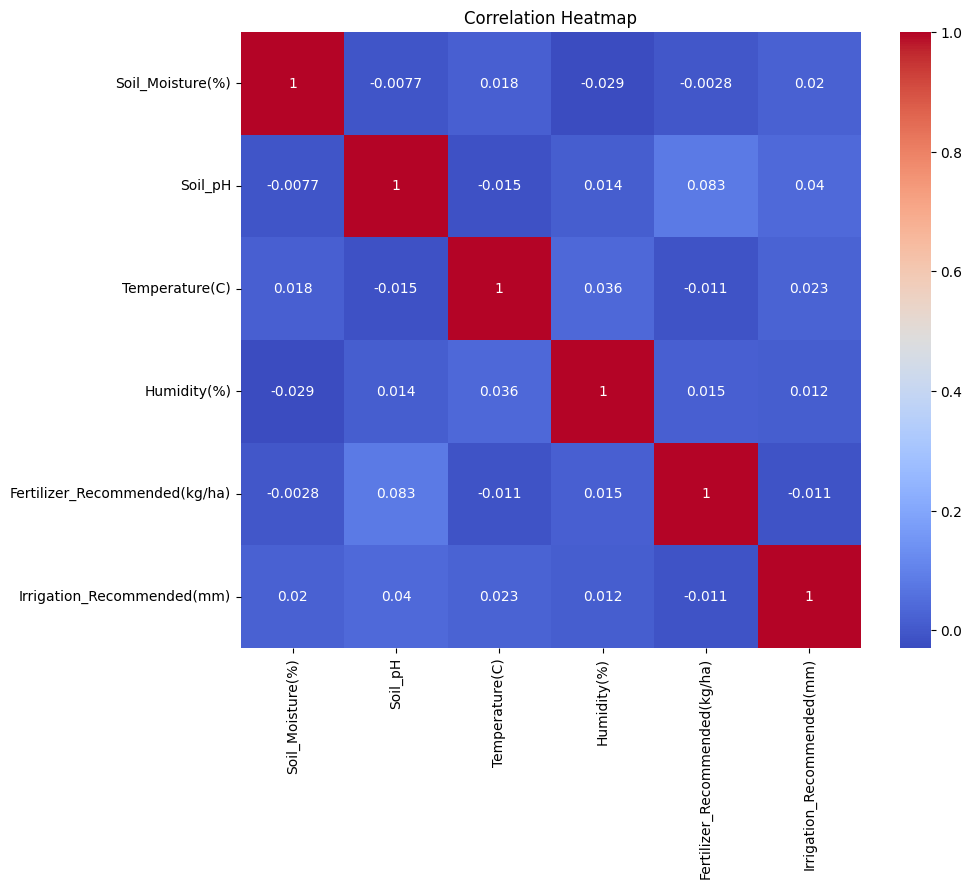

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
print(df[numeric_cols].dtypes)

Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
dtype: object


In [44]:
df[numeric_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082782
Humidity(%)                      0.015420
Soil_Moisture(%)                -0.002751
Temperature(C)                  -0.010626
Irrigation_Recommended(mm)      -0.010808
Name: Fertilizer_Recommended(kg/ha), dtype: float64

In [48]:
numeric_cols = [
    'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [49]:
df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)

Crop_Type
Wheat       47.179924
Maize       44.949013
Beans       44.333093
Tomatoes    44.181126
Lettuce     42.927380
Name: Soil_Moisture(%), dtype: float64

In [50]:
hot_crops = df.groupby('Crop_Type').filter(lambda x: x['Temperature(C)'].mean() > 30)
hot_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()

Series([], Name: Irrigation_Recommended(mm), dtype: float64)

In [51]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)